In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

У распеределения с плотностью $5x^{-6}$ на $[1, \infty)$ конечны первые 4 момента, а пятый нет, так как интеграл $\int_{1}^{+\infty} x^{-\alpha}$ сходится при $\alpha > 1$ и расходится иначе, причем $\int_{1}^{+\infty} 5x^{-6}=1$

In [76]:
N = 10000
toShow = [10, 25, 50, 100, 1000, N]

class MyDistribution(sts.rv_continuous):
    def _pdf(self, x):
        return 5.0 * x ** (-6.0)

def showGraphs():
    distr = MyDistribution(a=1, b=np.inf)
    sample = distr.rvs(size=N)
    grid = np.linspace(1, 20, 300)
    
    plt.figure(figsize=(9, 5))
    plt.plot(grid, distr.pdf(grid), label='$p(x)$')
    plt.scatter(sample, np.zeros(N), alpha=0.2, s=40, label='Sample')
    plt.legend()
    plt.ylim((-0.02, 1))
    plt.xlim((0, 20))
    plt.show()
    
    Sn = np.zeros(N)    
    for n in range(1, N):
        Sn[n] = np.std(sample[:n]) ** 2.0
        
    plt.figure(figsize=(9, 5))
    plt.plot(np.arange(1, N + 1), abs(Sn - distr.std()),\
             label='$|D[X] - S^{2}|$')
    plt.xlabel('n')
    plt.legend()
    plt.show()
    
    sample = sts.cauchy.rvs(size=N)
    Sn = np.zeros(N)    
    for n in range(1, N):
        Sn[n] = np.std(sample[:n]) ** 2.0
    plt.figure(figsize=(9, 5))
    plt.plot(np.arange(1, N + 1), Sn, label='$S^{2}$')
    plt.title('$S^{2}$ for Cauchy distribution')
    plt.xlabel('n')
    plt.legend()
    plt.show()
    
    

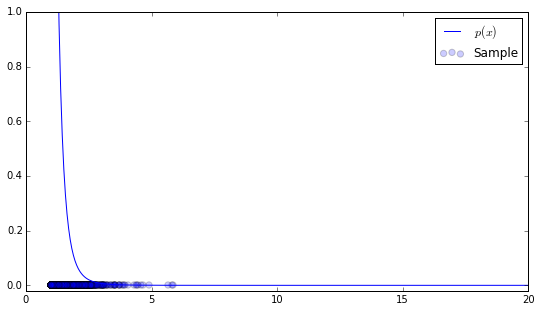

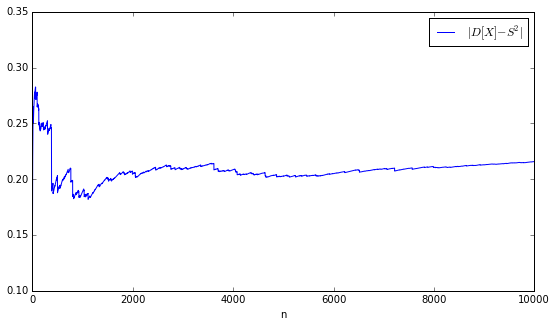

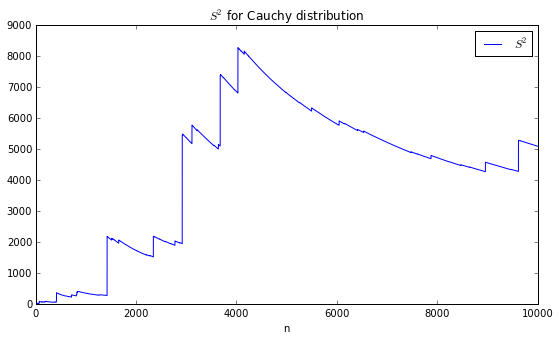

In [77]:
showGraphs()